**POZOR: Tento notebook je potrebné spustiť v Google Colab notebooku.**

# Neuromaľby

Tento notebook ukazuje, ako sa dá použiť algoritmus na neuro umelecké štýly z ["A Neural Algorithm of Artistic Style"](https://arxiv.org/abs/1508.06576). Implementáciu, ktorú budeme používať, sa dá nájsť v repozitári [github](https://github.com/titu1994/Neural-Style-Transfer.git). V rámci tohto notebooku si ten repozitár naklonujeme.

Tento notebook súbor je tiež adaptáciou notebook súboru z toho istého repozitára.

In [1]:
!git clone https://github.com/titu1994/Neural-Style-Transfer.git

fatal: destination path 'Neural-Style-Transfer' already exists and is not an empty directory.


In [2]:
dir_path = "Neural-Style-Transfer"
NETWORK = 'INetwork' + '.py'

# Zoznam argumentov, ktoré podporuje skript Network.py
!python {dir_path}/{NETWORK} -h

Using TensorFlow backend.
usage: INetwork.py [-h] [--style_masks STYLE_MASKS [STYLE_MASKS ...]]
                   [--content_mask CONTENT_MASK] [--color_mask COLOR_MASK]
                   [--image_size IMG_SIZE] [--content_weight CONTENT_WEIGHT]
                   [--style_weight STYLE_WEIGHT [STYLE_WEIGHT ...]]
                   [--style_scale STYLE_SCALE]
                   [--total_variation_weight TV_WEIGHT] [--num_iter NUM_ITER]
                   [--model MODEL] [--content_loss_type CONTENT_LOSS_TYPE]
                   [--rescale_image RESCALE_IMAGE]
                   [--rescale_method RESCALE_METHOD]
                   [--maintain_aspect_ratio MAINTAIN_ASPECT_RATIO]
                   [--content_layer CONTENT_LAYER] [--init_image INIT_IMAGE]
                   [--pool_type POOL] [--preserve_color COLOR]
                   [--min_improvement MIN_IMPROVEMENT]
                   base ref [ref ...] res_prefix

Neural style transfer with Keras.

positional arguments:
  base     

## Parametre Network.py

Na tomto mieste nastavíme všetky potrebné parametre pre skript `Network.py`.

In [0]:
# Veľkosť obrázka
IMAGE_SIZE = 400

# Váhy chybových kritérií
CONTENT_WEIGHT = 0.025
STYLE_WEIGHT = 1.0
STYLE_SCALE = 1.0
TOTAL_VARIATION_WEIGHT = 8.5e-5
CONTENT_LOSS_TYPE = 0

# Argumenty pre optimalizáciu
NUM_ITERATIONS = 10
MODEL = 'vgg16'
RESCALE_IMAGE = 'false'
# nastavte false ak je málo pamäte (OOM)
MAINTAIN_ASPECT_RATIO = 'true'  

# Argumenty pre transfer štýlu
# číslo 5_2 meňte len na niečo v podobnom formáte
CONTENT_LAYER = 'conv5_2'
INITIALIZATION_IMAGE = 'content'
POOLING_TYPE = 'max'

# Ďalšie argumenty
PRESERVE_COLOR = 'false'
MIN_IMPROVEMENT = 0.0

## Obrázok s obsahom

Po spustení nasledujúcej bunky je možné nahrať obrázok s obsahom. Prípustné je vybrať **len 1 obrázok**.

In [13]:
from google.colab import files

content_img = files.upload()

Saving cat.jpg to cat.jpg


In [14]:
import os

CONTENT_IMAGE_FN = list(content_img)[0]
CONTENT_IMAGE_FN_temp = CONTENT_IMAGE_FN.strip().replace(" ", "_")

if CONTENT_IMAGE_FN != CONTENT_IMAGE_FN_temp:
  os.rename(CONTENT_IMAGE_FN, CONTENT_IMAGE_FN_temp)
  CONTENT_IMAGE_FN = CONTENT_IMAGE_FN_temp
  
print("Názov súboru s obsahom:", CONTENT_IMAGE_FN)

Názov súboru s obsahom: cat.jpg


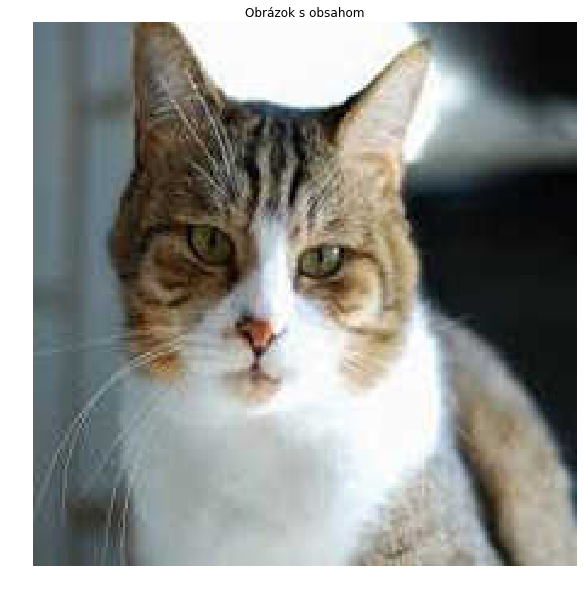

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
img = plt.imread(CONTENT_IMAGE_FN)
plt.axis('off')
plt.title('Obrázok s obsahom')
plt.imshow(img)

## Obrázok so štýlom

Po spustení nasledujúcej bunky je možné nahrať obrázok so štýlom. Prípustné je vybrať **len 1 obrázok**.

In [16]:
style_img = files.upload()

Saving picaso.jpg to picaso (2).jpg


In [17]:
STYLE_IMAGE_FN = list(style_img)[0]
STYLE_IMAGE_FN_temp = STYLE_IMAGE_FN.strip().replace(" ", "_")

if STYLE_IMAGE_FN != STYLE_IMAGE_FN_temp:
  os.rename(STYLE_IMAGE_FN, STYLE_IMAGE_FN_temp)
  STYLE_IMAGE_FN = STYLE_IMAGE_FN_temp
  
print("Názov súboru so štýlom:", STYLE_IMAGE_FN)

Názov súboru so štýlom: picaso.jpg


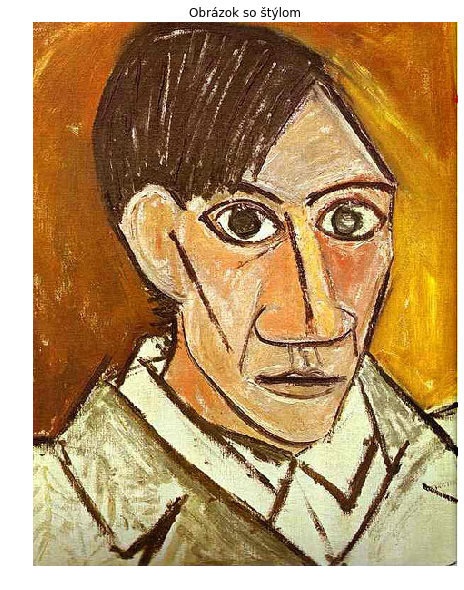

In [18]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(STYLE_IMAGE_FN)
plt.axis('off')
plt.title('Obrázok so štýlom')
plt.imshow(img)

## Generovanie obrázku

Spustením nasledujúcich buniek sa vygeneruje obrázok.

In [0]:
import os

RESULT_DIR = "generated/"
RESULT_PREFIX = RESULT_DIR + "gen"
FINAL_IMAGE_PATH = RESULT_PREFIX + "_at_iteration_%d.png" % (NUM_ITERATIONS)

if not os.path.exists(RESULT_DIR):
  os.makedirs(RESULT_DIR)

In [20]:
!python {dir_path}/{NETWORK} {CONTENT_IMAGE_FN} {STYLE_IMAGE_FN} {RESULT_PREFIX} \
  --image_size {IMAGE_SIZE} --content_weight {CONTENT_WEIGHT} --style_weight \
  {STYLE_WEIGHT} --style_scale {STYLE_SCALE} --total_variation_weight \
  {TOTAL_VARIATION_WEIGHT} --content_loss_type {CONTENT_LOSS_TYPE} --num_iter \
  {NUM_ITERATIONS} --model {MODEL} --rescale_image {RESCALE_IMAGE} \
  --maintain_aspect_ratio {MAINTAIN_ASPECT_RATIO} --content_layer {CONTENT_LAYER} \
  --init_image {INITIALIZATION_IMAGE} --pool_type {POOLING_TYPE} --preserve_color \
  {PRESERVE_COLOR} --min_improvement {MIN_IMPROVEMENT}

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
2019-04-25 11:53:11.602049: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2300000000 Hz
2019-04-25 11:53:11.602342: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x46fc580 executing computations on platform Host. Devices:
2019-04-25 11:53:11.602403: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>
2019-04-25 11:53:11.746390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-04-25 11:53:11.747002: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x46fc840 executing computations on platform CUDA. Devices:
2019-04-25 11:53:11.747061: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): Tesla T4, Compute Capability

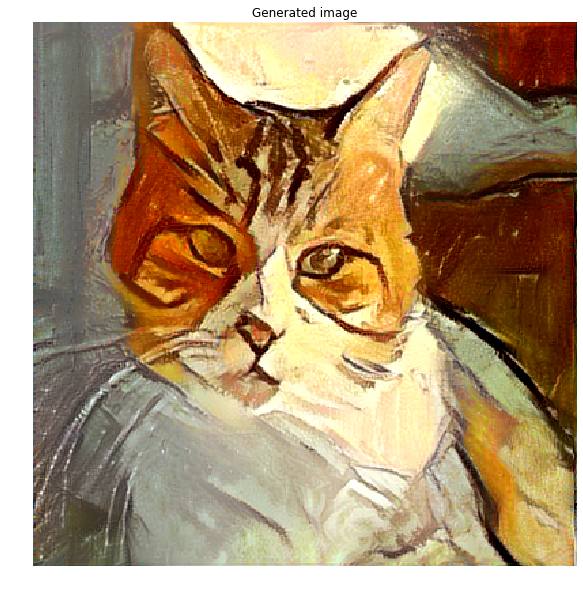

In [21]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Generated image')
plt.imshow(img)

## (Nepovinné) Transfer farieb

Ak chcete, aby sa do preštýlovaného obrázku preniesli farby z pôvodného obrázku s obsahom, spustite nasledujúce bunky.

In [22]:
COLOR_TRANSFER = 'color_transfer.py'
COLOR_FINAL_IMAGE_PATH = FINAL_IMAGE_PATH[:-4] + '_%s_color.png'

# Optional - Use Histogram matching (0 for no, 1 for yes)
HISTOGRAM_MATCH = 0

if HISTOGRAM_MATCH == 0:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('original')
else:
  COLOR_FINAL_IMAGE_PATH = COLOR_FINAL_IMAGE_PATH % ('histogram')
  

!python {dir_path}/{COLOR_TRANSFER} {CONTENT_IMAGE_FN} {FINAL_IMAGE_PATH} --hist_match {HISTOGRAM_MATCH}


Image saved at path : generated/gen_at_iteration_10_original_color.png


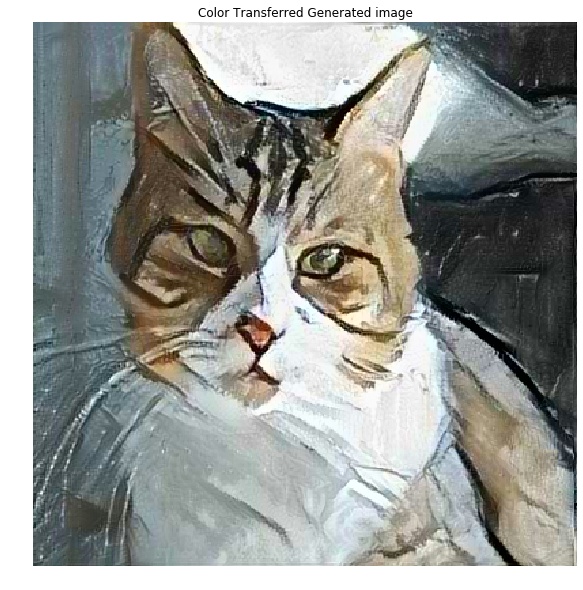

In [23]:
fig = plt.figure(figsize=(10, 10))
img = plt.imread(COLOR_FINAL_IMAGE_PATH)
plt.axis('off')
plt.title('Color Transferred Generated image')
plt.imshow(img)

<div style="background-color: #C2EB66; padding: 15px; padding-top: 5px; margin-top: 10px; margin-left:-15px">
<h2>Úloha</h2>

Aplikujte ten istý postup na iné obrázky so štýlom a obsahom.
</div>